
(필수) 각 과제별 연구 보고서를 1개씩 작성해야 합니다. - 보고서(구글닥스 각 2페이지 이내), 관련 코드 코랩(구글닥스에 포함 가능)

In [102]:
import torch
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron


# 데이터셋 생성
def makeSpamDataSet(train_size:float, valid_size:float, test_size:float, normalize:bool=False):

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
    column_names = [f'word_freq_{i}' for i in range(48)] + \
                [f'char_freq_{i}' for i in range(6)] + \
                ['capital_run_length_average', 'capital_run_length_longest', 
                    'capital_run_length_total', 'spam']

    df = pd.read_csv(url, header=None, names=column_names)

    # 특징과 레이블 분리
    x = df.iloc[:, :-1]  # 처음 57개 열이 특징
    y = df.iloc[:, -1]   # 마지막 열이 레이블 (spam:1, spam x : 0)

    x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=train_size, random_state=42)
    x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, train_size=valid_size/(valid_size+test_size), random_state=42)


    # 데이터 정규화
    if normalize == True :
        scaler = StandardScaler()
        x_train = scaler.fit_transform(x_train) # 통계치를 학습하고 변환
        x_validation = scaler.transform(x_validation) # Train의 통계치로 변환만
        x_test = scaler.transform(x_test) 

    print(f"✅ 데이터셋 생성 완료")
    print(f"   학습: {len(x_train)}개, 검증: {len(x_validation)}개, 테스트: {len(x_test)}개")
    print(f"   전체: {len(df)}개")

    return (x_train, x_validation, x_test, y_train, y_validation, y_test)


def excuteLogisticRegression(data_set:tuple[float,float,float,float,float,float]):

    x_train, x_validation, x_test, y_train, y_validation, y_test = data_set
    # 모델 학습
    model = LogisticRegression()
    model.fit(x_train, y_train)

    # 검증 데이터로 성능 평가
    accuracy1 = model.score(x_validation, y_validation)
    print("검증 데이터 정확도:", accuracy1)

    # # 테스트 데이터로 최종 성능 평가
    accuracy2 = model.score(x_test, y_test)
    print("테스트 데이터 정확도:", accuracy2)

    return model

def excuteRandomForestClassifier(data_set:tuple[float,float,float,float,float,float]):

    x_train, x_validation, x_test, y_train, y_validation, y_test = data_set
    rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model1.fit(x_train, y_train)

    # 검증 데이터로 성능 평가
    accuracy1 = rf_model1.score(x_validation, y_validation)
    print("검증 데이터 정확도:", accuracy1)

    # # 테스트 데이터로 최종 성능 평가
    accuracy2 = rf_model1.score(x_test, y_test)
    print("테스트 데이터 정확도:", accuracy2)

    return rf_model1

def excuteKNN(data_set:tuple[float,float,float,float,float,float], n_neighbors:int=5, metric:str="euclidean"):

    x_train, x_validation, x_test, y_train, y_validation, y_test = data_set

    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric) #euclidean, manhattan

    # 모델 학습
    knn_model.fit(x_train, y_train)

    # 검증 데이터로 성능 평가
    accuracy1 = knn_model.score(x_validation, y_validation)
    print("검증 데이터 정확도:", accuracy1)

    # # 테스트 데이터로 최종 성능 평가
    accuracy2 = knn_model.score(x_test, y_test)
    print("테스트 데이터 정확도:", accuracy2)

    return knn_model

def excuteNaiveBayes(data_set:tuple[float,float,float,float,float,float]):

    x_train, x_validation, x_test, y_train, y_validation, y_test = data_set
    # 가우시안 나이브 베이즈 모델 생성
    nb_model = GaussianNB()

    # 모델 학습
    nb_model.fit(x_train, y_train)

    # 검증 데이터로 성능 평가
    accuracy1 = nb_model.score(x_validation, y_validation)
    print("검증 데이터 정확도:", accuracy1)

    # # 테스트 데이터로 최종 성능 평가
    accuracy2 = nb_model.score(x_test, y_test)
    print("테스트 데이터 정확도:", accuracy2)

    return nb_model

def excuteSVM(data_set:tuple[float,float,float,float,float,float]):

    x_train, x_validation, x_test, y_train, y_validation, y_test = data_set
    svm = SVC()
    svm.fit(x_train, y_train)

    # 검증 데이터로 성능 평가
    accuracy1 = svm.score(x_validation, y_validation)
    print("검증 데이터 정확도:", accuracy1)

    # # 테스트 데이터로 최종 성능 평가
    accuracy2 = svm.score(x_test, y_test)
    print("테스트 데이터 정확도:", accuracy2)

    return svm

def excutePerceptron(data_set:tuple[float,float,float,float,float,float]):

    x_train, x_validation, x_test, y_train, y_validation, y_test = data_set
    perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
    perceptron.fit(x_train, y_train)

    # 검증 데이터로 성능 평가
    accuracy1 = perceptron.score(x_validation, y_validation)
    print("검증 데이터 정확도:", accuracy1)

    # # 테스트 데이터로 최종 성능 평가
    accuracy2 = perceptron.score(x_test, y_test)
    print("테스트 데이터 정확도:", accuracy2)

    return perceptron

In [103]:
# 1. 가상 데이터셋을 생성한 뒤, 학습·검증·테스트 데이터셋으로 분할해 보세요.

#     1-1. 데이터셋의 총 샘플 개수를 유지하면서 학습·검증·테스트의 비율을 여러 방식(예: 8:1:1, 7:2:1 등)으로 조정하며 성능 변화를 관찰하세요.

#     1-2. (연구 보고서 필수 조건)
# - 시도한 분할 비율과 각 경우의 모델 성능 결과
# - 최적의 분할 비율이라고 판단한 근거
# - 분할 비율이 성능에 영향을 준 과정에 대한 해석

# 샘플 데이터 생성
iris_dataset1 = makeSpamDataSet(0.6, 0.2, 0.2, normalize=True)
iris_dataset2 = makeSpamDataSet(0.7, 0.2, 0.1, normalize=True)
iris_dataset3 = makeSpamDataSet(0.8, 0.1, 0.1, normalize=True)


excuteLogisticRegression(iris_dataset1)
excuteLogisticRegression(iris_dataset2)
excuteLogisticRegression(iris_dataset3)


✅ 데이터셋 생성 완료
   학습: 2760개, 검증: 920개, 테스트: 921개
   전체: 4601개
✅ 데이터셋 생성 완료
   학습: 3220개, 검증: 920개, 테스트: 461개
   전체: 4601개
✅ 데이터셋 생성 완료
   학습: 3680개, 검증: 460개, 테스트: 461개
   전체: 4601개
검증 데이터 정확도: 0.9217391304347826
테스트 데이터 정확도: 0.9218241042345277
검증 데이터 정확도: 0.9173913043478261
테스트 데이터 정확도: 0.9349240780911063
검증 데이터 정확도: 0.9173913043478261
테스트 데이터 정확도: 0.9219088937093276


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [104]:
# 2. 이진 분류 가상 데이터셋을 생성하고, K-최근접이웃(K-NN) 알고리즘으로 학습·예측을 수행해 보세요.

#     2-1. k 값, 거리 측정 방식(Euclidean, Manhattan 등), 정규화 여부를 바꿔가며 최적의 결과를 탐색하세요.

#     2-2. (연구 보고서 필수 조건)
# - 다양한 파라미터 시도와 그에 따른 성능 비교표
# - 최적의 결과가 나온 설정값과 그 이유
# - 성능 차이가 발생한 이유에 대한 분석

not_normalize = makeSpamDataSet(0.6, 0.2, 0.2, normalize=False)
normalize = makeSpamDataSet(0.6, 0.2, 0.2, normalize=True)

# 정규화 여부
excuteKNN(not_normalize, n_neighbors=15, metric="manhattan")
excuteKNN(normalize, n_neighbors=15, metric="manhattan") 

# 거리측정 방식
excuteKNN(normalize, n_neighbors=15, metric="euclidean") #euclidean, manhattan

# k개수
excuteKNN(normalize, n_neighbors=5, metric="euclidean")


✅ 데이터셋 생성 완료
   학습: 2760개, 검증: 920개, 테스트: 921개
   전체: 4601개
✅ 데이터셋 생성 완료
   학습: 2760개, 검증: 920개, 테스트: 921개
   전체: 4601개
검증 데이터 정확도: 0.7923913043478261
테스트 데이터 정확도: 0.8034744842562432
검증 데이터 정확도: 0.8967391304347826
테스트 데이터 정확도: 0.8903365906623235
검증 데이터 정확도: 0.8978260869565218
테스트 데이터 정확도: 0.8968512486427795
검증 데이터 정확도: 0.8934782608695652
테스트 데이터 정확도: 0.9033659066232356


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


✅ 데이터셋 생성 완료
   학습: 2760개, 검증: 920개, 테스트: 921개
   전체: 4601개
검증 데이터 정확도: 0.9586956521739131
테스트 데이터 정확도: 0.9511400651465798
검증 데이터 정확도: 0.9380434782608695
테스트 데이터 정확도: 0.9239956568946797
검증 데이터 정확도: 0.8010869565217391
테스트 데이터 정확도: 0.8273615635179153
검증 데이터 정확도: 0.907608695652174
테스트 데이터 정확도: 0.9001085776330076
{'RandomForest': {'accuracy': 0.9511400651465798, 'precision': 0.9544235924932976, 'recall': 0.9270833333333334}, 'SVM': {'accuracy': 0.9239956568946797, 'precision': 0.9313186813186813, 'recall': 0.8828125}, 'NaiveBayes': {'accuracy': 0.8273615635179153, 'precision': 0.7184466019417476, 'recall': 0.9635416666666666}, 'Perceptron': {'accuracy': 0.9001085776330076, 'precision': 0.8578431372549019, 'recall': 0.9114583333333334}}


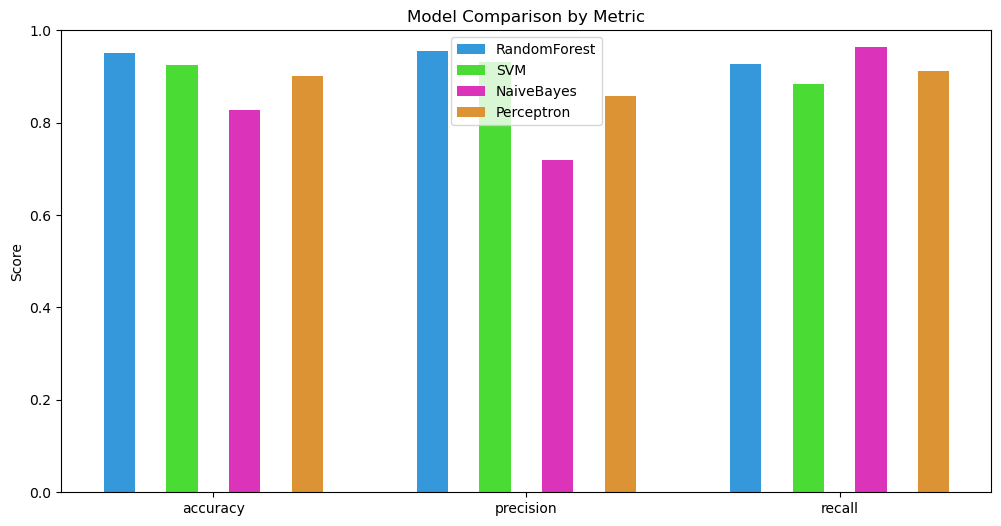

In [148]:
# 3. 동일한 이진 분류 가상 데이터셋을 생성하고, Perceptron, SVM, Random Forest, Naive Bayes 네 가지 알고리즘으로 학습해 보세요.

#     3-1. 각 모델의 정확도, 정밀도(Precision), 재현율(Recall)을 비교하고, 어떤 모델이 데이터 특성에 더 잘 맞는지 분석하세요.

#     3-2. (연구 보고서 필수 조건)
# - 모델별 성능 지표와 시각화 결과
# - 성능 차이가 발생한 이유에 대한 해석
# - 최적의 모델을 선택한 근거

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

iris_dataset = makeSpamDataSet(0.6, 0.2, 0.2, normalize=True)
x_train, x_validation, x_test, y_train, y_validation, y_test = iris_dataset

models = {"RandomForest":excuteRandomForestClassifier(iris_dataset),
            "SVM" : excuteSVM(iris_dataset), 
            "NaiveBayes" : excuteNaiveBayes(iris_dataset),
            "Perceptron" : excutePerceptron(iris_dataset)
        }

value = {"RandomForest" : {}, "SVM" : {}, "NaiveBayes" : {}, "Perceptron" : {}}

for name, model in models.items():
    y_pred = model.predict(x_test)
    value[name]["accuracy"]= accuracy_score(y_test, y_pred)
    value[name]["precision"]= precision_score(y_test, y_pred)
    value[name]["recall"] = recall_score(y_test, y_pred)

print(value)


# 그래프 설정
plt.figure(figsize=(12, 6)) 
x = np.arange(3)
width = 0.1

# 막대 그래프 그리기
bars1 = plt.bar(x-width*3, list(value["RandomForest"].values()), width, label='RandomForest', color='#3498db')
bars2 = plt.bar(x-width, list(value["SVM"].values()), width, label='SVM', color="#4adb34")
bars3 = plt.bar(x+width, list(value["NaiveBayes"].values()), width, label='NaiveBayes', color="#db34ba")
bars4 = plt.bar(x+width*3, list(value["Perceptron"].values()), width, label='Perceptron', color="#db9334")

plt.xticks(x, ["accuracy", "precision", "recall"])
plt.ylabel('Score')
plt.title('Model Comparison by Metric')
plt.legend()
plt.ylim(0, 1)
plt.show()



이미지 크기 증강전
검증 데이터 정확도: 0.9293333333333333
테스트 데이터 정확도: 0.9413333333333334
검증 데이터 정확도: 0.9306666666666666
테스트 데이터 정확도: 0.94
검증 데이터 정확도: 0.9493333333333334
테스트 데이터 정확도: 0.956
검증 데이터 정확도: 0.8506666666666667
테스트 데이터 정확도: 0.8706666666666667
이미지 크기 증강 후
검증 데이터 정확도: 0.9346666666666666
테스트 데이터 정확도: 0.9453333333333334
검증 데이터 정확도: 0.932
테스트 데이터 정확도: 0.9426666666666667
검증 데이터 정확도: 0.952
테스트 데이터 정확도: 0.9573333333333334
검증 데이터 정확도: 0.872
테스트 데이터 정확도: 0.8946666666666667


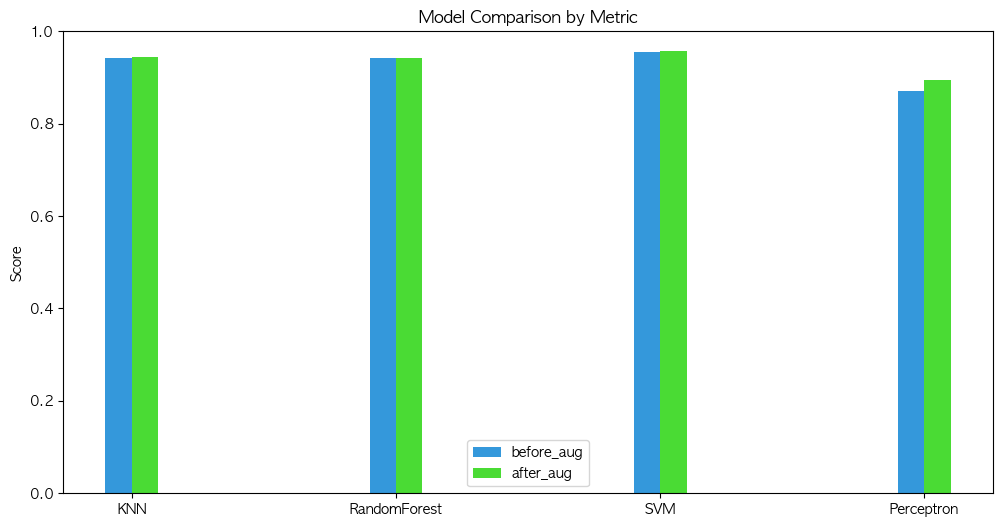

In [185]:
# 4.  가상의 이미지 또는 수치 데이터셋을 준비하고, 증강(Data Augmentation) 기법을 적용했을 때와 적용하지 않았을 때 모델 성능을 비교하세요.

#     4-1. 증강 방식은 직접 선택(예: 회전, 잡음 추가, 샘플 중복 등)하여 적용합니다.
    
#     4-2.  (연구 보고서 필수 조건)
# - 증강 전/후 성능 비교표와 시각화 자료
# - 어떤 증강 기법이 일반화 성능을 개선했는지 분석
# - 잘못된 증강이 오히려 성능을 떨어뜨릴 수 있는 이유를 근거를 들어 설명

import numpy as np
from PIL import Image
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# 28x28 → 42x42 리사이즈 함수
def resize_to_42x42(flat_image):
    img = Image.fromarray((flat_image.reshape(28, 28) * 255).astype(np.uint8))
    img_resized = img.resize((56, 56), Image.BICUBIC)
    return np.array(img_resized, dtype=np.float32).flatten() / 255.0  # 다시 0~1 정규화

def getAccuracy(model, x_test, y_test) : 
    y_pred = model.predict(x_test)
    return accuracy_score(y_test, y_pred)

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

x = mnist.data.astype(np.float32) / 255.0   # 정규화 (0~1)
y = mnist.target.astype(np.int64)

x = x[:5000]
y = y[:5000]

x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=0.7, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, train_size=0.5, random_state=42)

# 여러가지 모델로 성능 테스트
before_list = []
print("이미지 크기 증강전")
model1 = excuteKNN((x_train, x_validation, x_test, y_train, y_validation, y_test))
before_list.append(getAccuracy(model=model1, x_test=x_test, y_test=y_test))

model2 = excuteRandomForestClassifier((x_train, x_validation, x_test, y_train, y_validation, y_test))
before_list.append(getAccuracy(model=model1, x_test=x_test, y_test=y_test))

model3 = excuteSVM((x_train, x_validation, x_test, y_train, y_validation, y_test))
before_list.append(getAccuracy(model=model3, x_test=x_test, y_test=y_test))

model4 = excutePerceptron((x_train, x_validation, x_test, y_train, y_validation, y_test))
before_list.append(getAccuracy(model=model4, x_test=x_test, y_test=y_test))

# 증강된 모델로 성능 테스트
# mnist모델 증강하기
x_train_aug = np.array([resize_to_42x42(img) for img in x_train])
x_validation_aug = np.array([resize_to_42x42(img) for img in x_validation])
x_test_aug = np.array([resize_to_42x42(img) for img in x_test])

print("이미지 크기 증강 후")
after_list = []

model1_aug = excuteKNN((x_train_aug, x_validation_aug, x_test_aug, y_train, y_validation, y_test))
after_list.append(getAccuracy(model=model1_aug, x_test=x_test_aug, y_test=y_test))

model2_aug = excuteRandomForestClassifier((x_train_aug, x_validation_aug, x_test_aug, y_train, y_validation, y_test))
after_list.append(getAccuracy(model=model2_aug, x_test=x_test_aug, y_test=y_test))

model3_aug = excuteSVM((x_train_aug, x_validation_aug, x_test_aug, y_train, y_validation, y_test))
after_list.append(getAccuracy(model=model3_aug, x_test=x_test_aug, y_test=y_test))

model4_aug = excutePerceptron((x_train_aug, x_validation_aug, x_test_aug, y_train, y_validation, y_test))
after_list.append(getAccuracy(model=model4_aug, x_test=x_test_aug, y_test=y_test))

# 그래프 설정
plt.figure(figsize=(12, 6)) 
x = np.arange(4)
width = 0.1

# 막대 그래프 그리기
bars1 = plt.bar(x-width/2, before_list, width, label='before_aug', color='#3498db')
bars2 = plt.bar(x+width/2, after_list, width, label='after_aug', color="#4adb34")


plt.xticks(x, ["KNN", "RandomForest", "SVM", "Perceptron"])
plt.ylabel('Score')
plt.title('Model Comparison by Metric')
plt.legend()
plt.ylim(0, 1)
plt.show()



